In [11]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
train_ds="/kaggle/input/gender-classification-dataset/Training"
test_ds="/kaggle/input/gender-classification-dataset/Validation"

# Data preprocessing
****

In [13]:
root_path = "/kaggle/input/gender-classification-dataset/Training/"
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)
class_dis = [len(os.listdir(root_path + name)) for name in class_names]
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")
print(f"female : {class_dis[0]} \nmale : {class_dis[1]}")

Total Number of Classes : 2 
Class Names : ['female', 'male']
female : 23243 
male : 23766


In [14]:
os.listdir('/kaggle/input/gender-classification-dataset/Training')

['female', 'male']

In [15]:
import plotly.express as px

In [16]:
fig = px.pie(names=class_names, values=class_dis,
             title="Training Class Distribution", hole=0.4)
fig.update_layout({'title':{'x':0.48}})
fig.show()

In [17]:
valid_path = "/kaggle/input/gender-classification-dataset/Validation/"
valid_dis = [len(os.listdir(valid_path + name)) for name in class_names]
fig = px.pie(names=class_names, values=valid_dis,
             title="test Class Distribution", hole=0.4)
fig.update_layout({'title':{'x':0.48}})
fig.show()

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255)#initialize train generator 
                                 
test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize test generator

In [19]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)

test_datagen = ImageDataGenerator()


train_generator = train_datagen.flow_from_directory(train_ds,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')


Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [20]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [21]:
img= train_generator[0]
print(img)

(array([[[[105.31296 ,  60.619694,  39.926426],
         [107.      ,  62.      ,  41.      ],
         [112.67732 ,  66.96765 ,  44.548325],
         ...,
         [145.      , 121.      ,  97.      ],
         [145.      , 121.      ,  97.      ],
         [145.      , 121.      ,  97.      ]],

        [[106.11545 ,  61.426895,  40.738346],
         [107.807465,  62.80747 ,  41.80747 ],
         [112.98998 ,  67.28268 ,  44.868065],
         ...,
         [146.34578 , 121.807465,  97.807465],
         [146.34578 , 121.807465,  97.807465],
         [146.34578 , 121.807465,  97.807465]],

        [[111.41917 ,  66.73534 ,  46.051502],
         [113.      ,  68.      ,  47.      ],
         [115.114845,  69.4099  ,  47.      ],
         ...,
         [155.      , 127.      , 103.      ],
         [155.      , 127.      , 103.      ],
         [155.      , 127.      , 103.      ]],

        ...,

        [[ 40.34891 ,  26.      ,  19.325544],
         [ 39.      ,  26.      ,  20.      

In [22]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [23]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 2)


In [24]:
print(len(train_generator))
print(len(test_ds))

1470
54


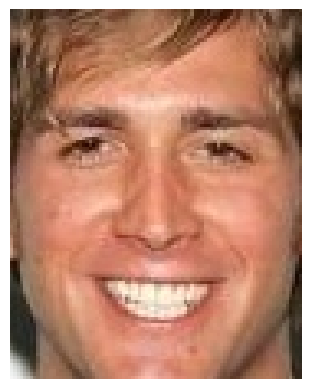

In [25]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/kaggle/input/gender-classification-dataset/Training/male/090553.jpg.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [26]:
from keras.layers import MaxPool2D

# Build VVG_19 Model

In [27]:
# VGG 19 Model
class VGG19(Sequential):
    def __init__(self, input_shape):
        super().__init__()

        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu', input_shape= input_shape))
        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(2, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam(0.003),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [28]:
model = VGG19((224, 224, 3))

In [29]:
# Print the model summary

model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                         

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [31]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [32]:
history =model.fit(train_generator, validation_data=test_generator, epochs=7)

Epoch 1/7
1470/1470 [==============================] - 1029s 687ms/step - loss: 0.4392 - accuracy: 0.7736 - val_loss: 0.1404 - val_accuracy: 0.9472
Epoch 2/7
1470/1470 [==============================] - 844s 574ms/step - loss: 0.1587 - accuracy: 0.9425 - val_loss: 0.1026 - val_accuracy: 0.9633
Epoch 3/7
1470/1470 [==============================] - 830s 565ms/step - loss: 0.1335 - accuracy: 0.9520 - val_loss: 0.1050 - val_accuracy: 0.9632
Epoch 4/7
1470/1470 [==============================] - 845s 574ms/step - loss: 0.1217 - accuracy: 0.9574 - val_loss: 0.1111 - val_accuracy: 0.9625
Epoch 5/7
1470/1470 [==============================] - 867s 590ms/step - loss: 0.1129 - accuracy: 0.9596 - val_loss: 0.0905 - val_accuracy: 0.9657
Epoch 6/7
1470/1470 [==============================] - 850s 578ms/step - loss: 0.1091 - accuracy: 0.9619 - val_loss: 0.0926 - val_accuracy: 0.9679
Epoch 7/7
1470/1470 [==============================] - 845s 575ms/step - loss: 0.1040 - accuracy: 0.9636 - val_loss: 

In [33]:
n_categories = len(os.listdir('/kaggle/input/gender-classification-dataset/Validation'))# number of categories print(n_categories)

In [34]:
n_categories

2

In [35]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,0.439176,0.773639,0.140397,0.947206
1,0.158680,0.942458,0.102592,0.963259
2,0.133472,0.952030,0.105036,0.963173
3,0.121692,0.957391,0.111086,0.962486
4,0.112925,0.959582,0.090508,0.965662


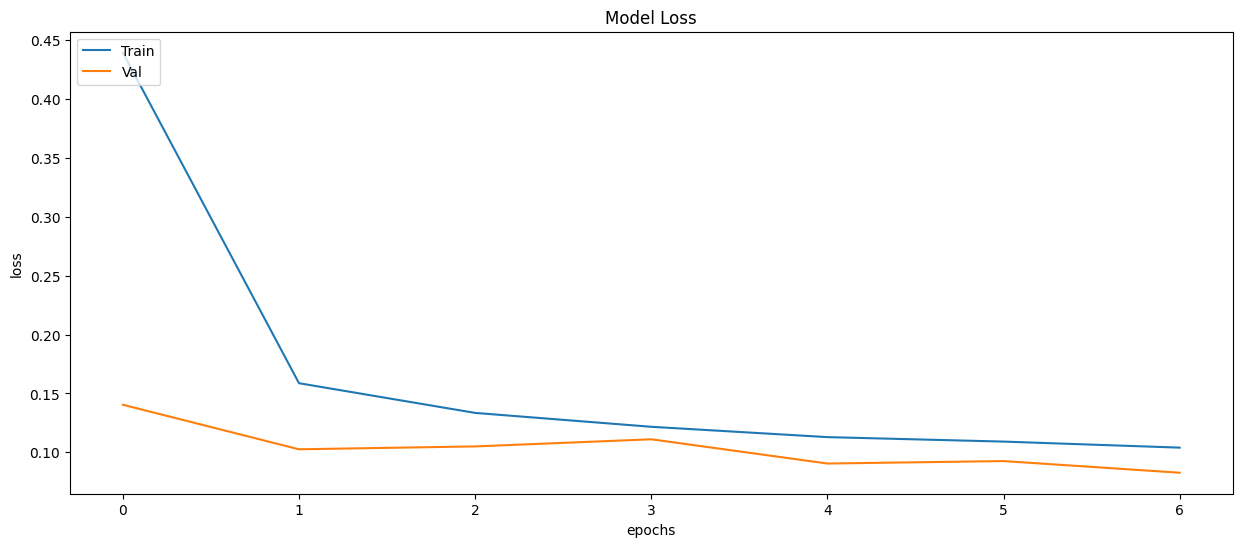

In [36]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

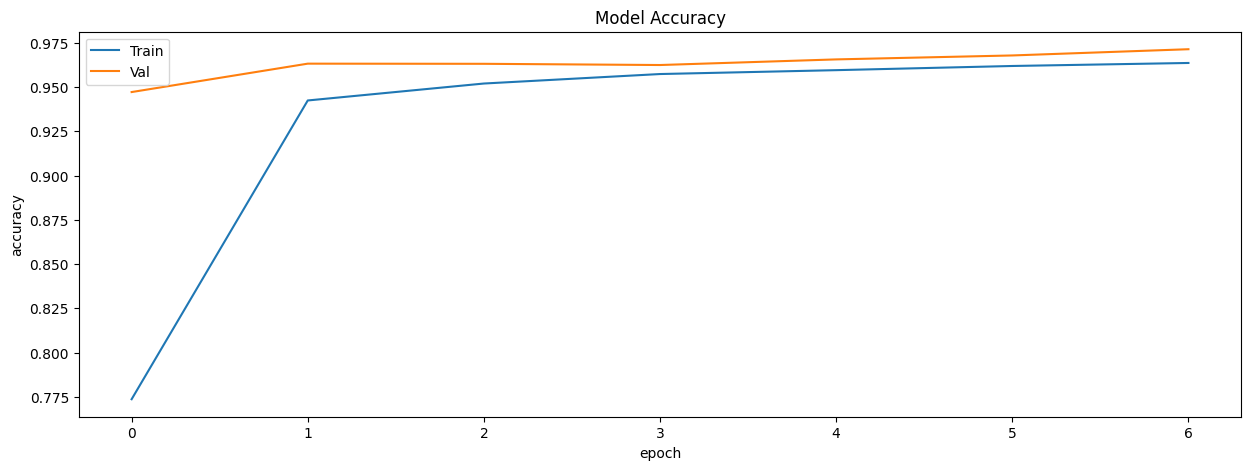

In [37]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [38]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

365/365 [==============================] - 55s 149ms/step


In [39]:
results =model.evaluate(test_generator)

365/365 [==============================] - 55s 149ms/step - loss: 0.0827 - accuracy: 0.9714


In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5841
           1       0.98      0.96      0.97      5808

    accuracy                           0.97     11649
   macro avg       0.97      0.97      0.97     11649
weighted avg       0.97      0.97      0.97     11649



Thank You !